Name:- Amarpreet kaur lotte


Email:- amarpreetkaurlotte@gmail.com


Codsoft_List_Task1:- TITANIC SURVIVAL PREDICTION

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [13]:
# Provide the path to your dataset 
file_path = 'Titanic-Dataset.csv'

# Load the dataset into a pandas DataFrame
data = pd.read_csv(file_path)


In [14]:
# Display the first few rows
print("Dataset preview:")
print(data.head())

Dataset preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [7]:
# Step 1: Data Exploration
print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          68

In [8]:
# Step 2: Data Cleaning
# Drop unnecessary columns
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing Age with median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing Embarked with the most common value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Convert categorical columns to numeric
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

print("\nCleaned Dataset:")
print(data.head())



Cleaned Dataset:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         2
1         1       1    1  38.0      1      0  71.2833         0
2         1       3    1  26.0      0      0   7.9250         2
3         1       1    1  35.0      1      0  53.1000         2
4         0       3    0  35.0      0      0   8.0500         2


In [9]:
# Step 3: Splitting Data
X = data.drop('Survived', axis=1)  # Features
y = data['Survived']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Step 4: Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)


Model Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179


Confusion Matrix:


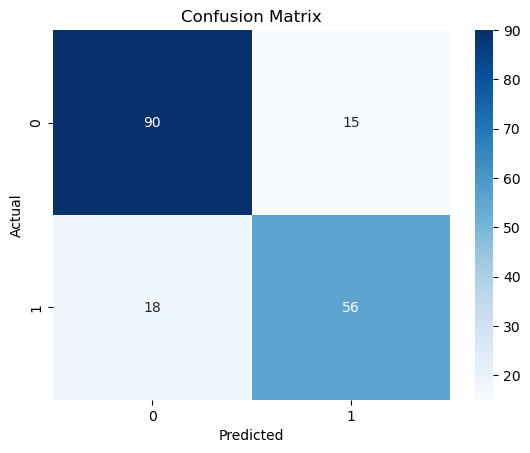


Feature Importances:
    Feature  Importance
5      Fare    0.272501
1       Sex    0.269387
2       Age    0.251845
0    Pclass    0.087854
3     SibSp    0.047876
4     Parch    0.037125
6  Embarked    0.033413


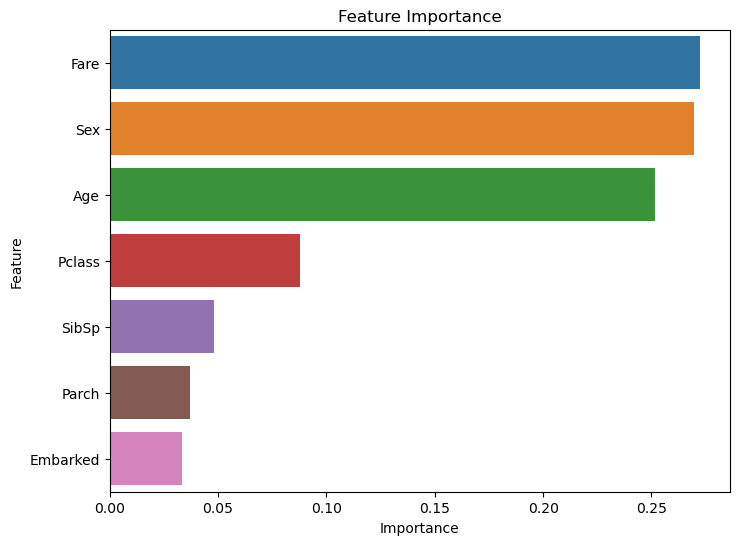

In [11]:
# Step 5: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Optional: Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()


In [12]:
# Function to predict survival for a specific row in the dataset
def predict_from_dataset():
    print("\nEnter the index of a passenger (0 to {}):".format(len(data) - 1))
    index = int(input("Index: "))

    # Check if the index is valid
    if index < 0 or index >= len(data):
        print("\nInvalid index. Please enter a number between 0 and {}.".format(len(data) - 1))
        return

    # Get the feature values for the specified index
    row = X.iloc[index].values.reshape(1, -1)  # Features for prediction
    actual_survival = y.iloc[index]  # Actual survival status

    # Predict survival
    prediction = model.predict(row)[0]
    survival_status_pred = "Survived" if prediction == 1 else "Did Not Survive"
    survival_status_actual = "Survived" if actual_survival == 1 else "Did Not Survive"

    # Output results
    print("\nPrediction for passenger at index {}: {}".format(index, survival_status_pred))
    print("Actual survival status: {}".format(survival_status_actual))
    print("Comparison: {}".format("Match" if prediction == actual_survival else "Mismatch"))

# Call the function for user input
predict_from_dataset()



Enter the index of a passenger (0 to 890):

Prediction for passenger at index 294: Did Not Survive
Actual survival status: Did Not Survive
Comparison: Match


c:\Users\caren\.InstallAnywhere\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
